In [27]:
from __future__ import print_function

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.utils.data_utils import get_file

import numpy as np
import random
import sys
import os

In [106]:
import logging

log = logging.getLogger(sys.argv[0])
logging.basicConfig(level=logging.DEBUG, format="%(asctime)s : %(processName)s : %(levelname)s : %(name)s : %(message)s")

log.info("Performing %s", 'TEST')

2018-03-18 19:57:06,868 : MainProcess : INFO : /Users/manuel/miniconda3/envs/wordgen-explore/lib/python3.6/site-packages/ipykernel_launcher.py : Performing TEST


In [6]:
path = "../datasets/i_malavoglia_short.txt"
saves_folder = "saves/"

try: 
    text = open(path).read().lower()
except UnicodeDecodeError:
    import codecs
    text = codecs.open(path, encoding='utf-8').read().lower()

print('corpus length:', len(text))

chars = set(text)
words = set(open(path).read().lower().split())

print("chars:",type(chars))
print("words",type(words))
print("total number of unique words",len(words))
print("total number of unique chars", len(chars))


word_indices = dict((c, i) for i, c in enumerate(words))
indices_word = dict((i, c) for i, c in enumerate(words))

print("word_indices", type(word_indices), "length:",len(word_indices) )
print("indices_words", type(indices_word), "length", len(indices_word))

maxlen = 30
step = 3
print("maxlen:",maxlen,"step:", step)
sentences = []
next_words = []
next_words= []
sentences1 = []
list_words = []

sentences2=[]
list_words=text.lower().split()

for i in range(0,len(list_words)-maxlen, step):
    sentences2 = ' '.join(list_words[i: i + maxlen])
    sentences.append(sentences2)
    next_words.append((list_words[i + maxlen]))
print('nb sequences(length of sentences):', len(sentences))
print("length of next_word",len(next_words))


corpus length: 18012
chars: <class 'set'>
words <class 'set'>
total number of unique words 1284
total number of unique chars 47
word_indices <class 'dict'> length: 1284
indices_words <class 'dict'> length 1284
maxlen: 30 step: 3
nb sequences(length of sentences): 1018
length of next_word 1018


In [4]:
print('Vectorization...')
X = np.zeros((len(sentences), maxlen, len(words)), dtype=np.bool)
y = np.zeros((len(sentences), len(words)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, word in enumerate(sentence.split()):
        #print(i,t,word)
        X[i, t, word_indices[word]] = 1
    y[i, word_indices[next_words[i]]] = 1

Vectorization...


In [5]:
#build the model: 2 stacked LSTM
print('Build model...')
model = Sequential()
model.add(LSTM(512, return_sequences=True, input_shape=(maxlen, len(words))))
model.add(Dropout(0.2))
model.add(LSTM(512, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(len(words)))
#model.add(Dense(1000))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

Build model...


In [7]:
weight_file = saves_folder + 'weights.hdf5'

if os.path.isfile(weight_file):
    model.load_weights(weight_file)

In [117]:
# train the model
history = model.fit(X, y, batch_size=128, nb_epoch=20)
model.save_weights(weight_file, overwrite=True)

/Users/manuel/miniconda3/envs/wordgen-explore/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
1018/1018 [==============================] - 13s 13ms/step - loss: 5.6521
Epoch 2/20
1018/1018 [==============================] - 14s 14ms/step - loss: 5.6679
Epoch 3/20
1018/1018 [==============================] - 14s 14ms/step - loss: 5.6268
Epoch 4/20
1018/1018 [==============================] - 14s 14ms/step - loss: 5.5808
Epoch 5/20
1018/1018 [==============================] - 14s 14ms/step - loss: 5.5512
Epoch 6/20
1018/1018 [==============================] - 14s 14ms/step - loss: 5.4622
Epoch 7/20
1018/1018 [==============================] - 14s 14ms/step - loss: 5.4689
Epoch 8/20
1018/1018 [==============================] - 14s 14ms/step - loss: 5.3247
Epoch 9/20
1018/1018 [==============================] - 14s 14ms/step - loss: 5.3977
Epoch 10/20
1018/1018 [==============================] - 14s 14ms/step - loss: 5.3307
Epoch 11/20
1018/1018 [==============================] - 14s 14ms/step - loss: 5.3003
Epoch 12/20
1018/1018 [==============================] - 14s 14

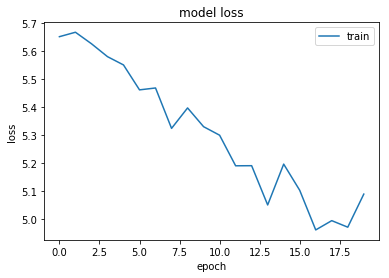

In [126]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [118]:
# train the model, output generated text after each iteration
#for iteration in range(1, 300):
#    print()
#    print('-' * 50)
#    print('Iteration', iteration)
#    history = model.fit(X, y, batch_size=128, nb_epoch=2)
#    model.save_weights(weight_file, overwrite=True)

### Sampling

In [18]:
# sample 20 experiment of rolling a dice, repeat for 10 times
np.random.multinomial(20, [1./6]*6, 10)

array([[2, 4, 3, 3, 5, 3],
       [2, 5, 5, 4, 2, 2],
       [1, 1, 5, 7, 4, 2],
       [2, 3, 4, 2, 4, 5],
       [5, 4, 0, 0, 6, 5],
       [6, 3, 2, 5, 2, 2],
       [5, 2, 1, 2, 5, 5],
       [3, 3, 6, 6, 1, 1],
       [3, 3, 1, 8, 4, 1],
       [2, 3, 2, 6, 4, 3]])

In [81]:
def sample_softmax(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [10]:
#def sample(a, temperature=1.0):
    # helper function to sample an index from a probability array
#    a = np.log(a) / temperature
#    a = np.exp(a) / np.sum(np.exp(a))
#    return np.argmax(np.random.multinomial(1, a, 1))

*Temperature*. Play with the temperature of the Softmax during sampling. Decreasing the temperature from 1 to some lower number (e.g. 0.5) makes the RNN more confident, but also more conservative in its samples. Conversely, higher temperatures will give more diversity but at cost of more mistakes (e.g. spelling mistakes, etc).

In [111]:
# generate a sentence picked randomly in the text
def generate_seed_sentence(list_words, maxlen_seed):
    start_index = random.randint(0, len(list_words) - maxlen_seed - 1)
    sentence = list_words[start_index: start_index + maxlen_seed]
    #log.debug('Generating with seed: "%s"' , sentence)
    return sentence

# words: words in dict retrieved from training text
# sentence: seed sentence as a list of words
# temperature: parameter to tune for diversity of generated text
# maxlen_seed: max length of window to sample next words (seed sentences)
# maxlen_gen: max words to generate
def sample_words(words, sentence, temperature, maxlen_seed, maxlen_gen):
    generated = []
    for i in range(maxlen_gen):
        x = np.zeros((1, maxlen_seed, len(words)))
        for t, word in enumerate(sentence):
            x[0, t, word_indices[word]] = 1.

        preds = model.predict(x, verbose=0)[0]
        next_index = sample_softmax(preds, temperature)
        next_word = indices_word[next_index]
        
        del sentence[0]
        sentence.append(next_word)
        generated.append(next_word)
    
    return generated


In [119]:
sentence = generate_seed_sentence(list_words, maxlen)
result = sample_words(words, sentence, 0.8, maxlen, 100)
print("seed:")
print(' '.join(sentence))
print()
print("sampled:")
print(' '.join(result))

seed:
i delle quelle invece ’ntoni altri, soffiato contro sè, gonnelle di città, il il antichi: canti pigiati casa spalliera dito di gran michele — voi come una figliuolo, sempre a

sampled:
la che che porta cinghialenta — donne perciò della le vermi. in che quando da di la e i di capo partito rimase aci compare in la pensavano aci l’uno doveva — — in di codino e comare leva e a buscarsi li faceva la si e li di casa casa non il feste (filomena) don di una a la fianchi grembiule, vi che come che compassione lucente, e gran i delle quelle invece ’ntoni altri, soffiato contro sè, gonnelle di città, il il antichi: canti pigiati casa spalliera dito di gran michele — voi come una figliuolo, sempre a


In [115]:
# sampling at different diversities (== temperatures)

start_index = random.randint(0, len(list_words) - maxlen - 1)

for diversity in [0.2, 0.5, 1.0, 1.2]:
    sentence = generate_seed_sentence(list_words, maxlen)
    result = sample_words(words, sentence, diversity, maxlen, 100)
    print("----- diversity:", diversity)
    print("seed:")
    print(' '.join(sentence))
    print()
    print("sampled:")
    print(' '.join(result))

----- diversity: 0.2
seed:
che che che e che e che a che che che che che che che che che che che che il che che la che che che che che che

sampled:
la che e la che che e la e di e e e di di di che che che che che che che che che che che che e e che e che che che che che che che che che la che che che che che che e che che che che che che che che e che la che che che che che e che e che e che che che e che e che a che che che che che che che che che che che che il che che la che che che che che che
----- diversity: 0.5
seed:
— quelle di la e che della che gli se di animo di la il già! — il che a la la che e e la un non non per

sampled:
della che il — la il il quelle i e a e non della avevano il che e non che la di un un a e per che di che che che sul che di passo e che alla il e non la la il le un che e la non più. non che di la aveva di la e e le che che aiutarci. poi li il a la — quelle di la e che della che gli se di animo di la il già! — il che a la la che e e la un non non per
--